# Digest

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id

In [13]:
path_reference_free = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/digest_reference_free_mqc.tsv")
path_reference_based = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/digest_reference_based_mqc.tsv")

In [18]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

free_df = pd.read_csv(path_reference_free, sep="\t")
free_df = pd.melt(free_df, id_vars='ID', var_name='source', value_name='value')
free_df[["seed_id","network_id","amim_id"]] = free_df.ID.apply(split_module_id)
free_df["network"] = free_df["network_id"].replace(dict(zip(network_meta_df.id, network_meta_df.label)))
free_df["amim"] = free_df["amim_id"].replace(dict(zip(amim_meta_df.id, amim_meta_df.label)))
free_df

,ID,source,value,seed_id,network_id,amim_id,network,amim
0,UC.nedrex.reviewed_proteins_exp.Symbol.rwr,GO.BP,2.699404,UC,nedrex.reviewed_proteins_exp.Symbol,rwr,NeDRex,RWR
1,UC.string.human_physical_links_v12_0_min900.Sy...,GO.BP,0.200405,UC,string.human_physical_links_v12_0_min900.Symbol,rwr,"STRING (physical, highest confidence)",RWR
2,CD.string.human_physical_links_v12_0_min900.Sy...,GO.BP,0.093561,CD,string.human_physical_links_v12_0_min900.Symbol,domino,"STRING (physical, highest confidence)",DOMINO
3,HD.nedrex.reviewed_proteins_exp_high_confidenc...,GO.BP,0.557954,HD,nedrex.reviewed_proteins_exp_high_confidence.S...,firstneighbor,NeDRex (high confidence),1st Neighbors
4,HD.hippie.v2_3_high_confidence.Symbol.diamond,GO.BP,1.523313,HD,hippie.v2_3_high_confidence.Symbol,diamond,HIPPIE (high confidence),DIAMOnD
...,...,...,...,...,...,...,...,...
1391,HD.string.human_physical_links_v12_0_min700.Sy...,KEGG,0.234766,HD,string.human_physical_links_v12_0_min700.Symbol,robust_bias_aware,"STRING (physical, high confidence)",ROBUST\n(bias aware)
1392,UC.hippie.v2_3_high_confidence.Symbol.rwr,KEGG,2.398374,UC,hippie.v2_3_high_confidence.Symbol,rwr,HIPPIE (high confidence),RWR
1393,CD.hippie.v2_3_medium_confidence.Symbol.robust,KEGG,3.000434,CD,hippie.v2_3_medium_confidence.Symbol,robust,HIPPIE (medium confidence),ROBUST
1394,CD.iid.human.Symbol.no_tool,KEGG,0.745162,CD,iid.human.Symbol,no_tool,IID,Only seeds


In [19]:
amim_meta_no_seeds_df = amim_meta_df[amim_meta_df.id != "no_tool"]
based_df = pd.read_csv(path_reference_based, sep="\t")
based_df = pd.melt(based_df, id_vars='ID', var_name='source', value_name='value')
based_df[["seed_id","network_id","amim_id"]] = based_df.ID.apply(split_module_id)
based_df["network"] = based_df["network_id"].replace(dict(zip(network_meta_df.id, network_meta_df.label)))
based_df["amim"] = based_df["amim_id"].replace(dict(zip(amim_meta_df.id, amim_meta_df.label)))
based_df

,ID,source,value,seed_id,network_id,amim_id,network,amim
0,HD.string.human_links_v12_0_min900.Symbol.robust,GO.BP,0.967010,HD,string.human_links_v12_0_min900.Symbol,robust,STRING (highest confidence),ROBUST
1,UC.biogrid.4_4_242_homo_sapiens.Symbol.rwr,GO.BP,3.000434,UC,biogrid.4_4_242_homo_sapiens.Symbol,rwr,BioGRID,RWR
2,ALS.string.human_links_v12_0_min700.Symbol.rwr,GO.BP,3.000434,ALS,string.human_links_v12_0_min700.Symbol,rwr,STRING (high confidence),RWR
3,CD.nedrex.reviewed_proteins_exp_high_confidenc...,GO.BP,2.699404,CD,nedrex.reviewed_proteins_exp_high_confidence.S...,robust,NeDRex (high confidence),ROBUST
4,LUAD.string.human_physical_links_v12_0_min700....,GO.BP,3.000434,LUAD,string.human_physical_links_v12_0_min700.Symbol,domino,"STRING (physical, high confidence)",DOMINO
...,...,...,...,...,...,...,...,...
1191,UC.string.human_physical_links_v12_0_min700.Sy...,KEGG,2.699404,UC,string.human_physical_links_v12_0_min700.Symbol,diamond,"STRING (physical, high confidence)",DIAMOnD
1192,CD.hippie.v2_3_medium_confidence.Symbol.diamond,KEGG,3.000434,CD,hippie.v2_3_medium_confidence.Symbol,diamond,HIPPIE (medium confidence),DIAMOnD
1193,CD.string.human_links_v12_0_min700.Symbol.rwr,KEGG,3.000434,CD,string.human_links_v12_0_min700.Symbol,rwr,STRING (high confidence),RWR
1194,LUAD.string.human_physical_links_v12_0_min900....,KEGG,3.000434,LUAD,string.human_physical_links_v12_0_min900.Symbol,rwr,"STRING (physical, highest confidence)",RWR


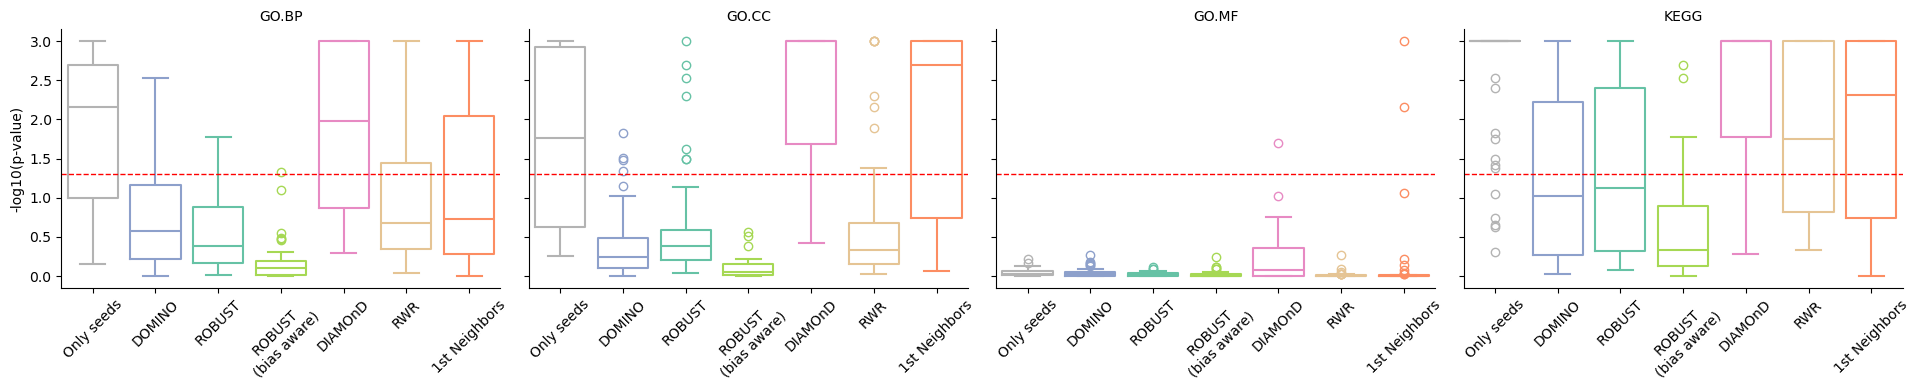

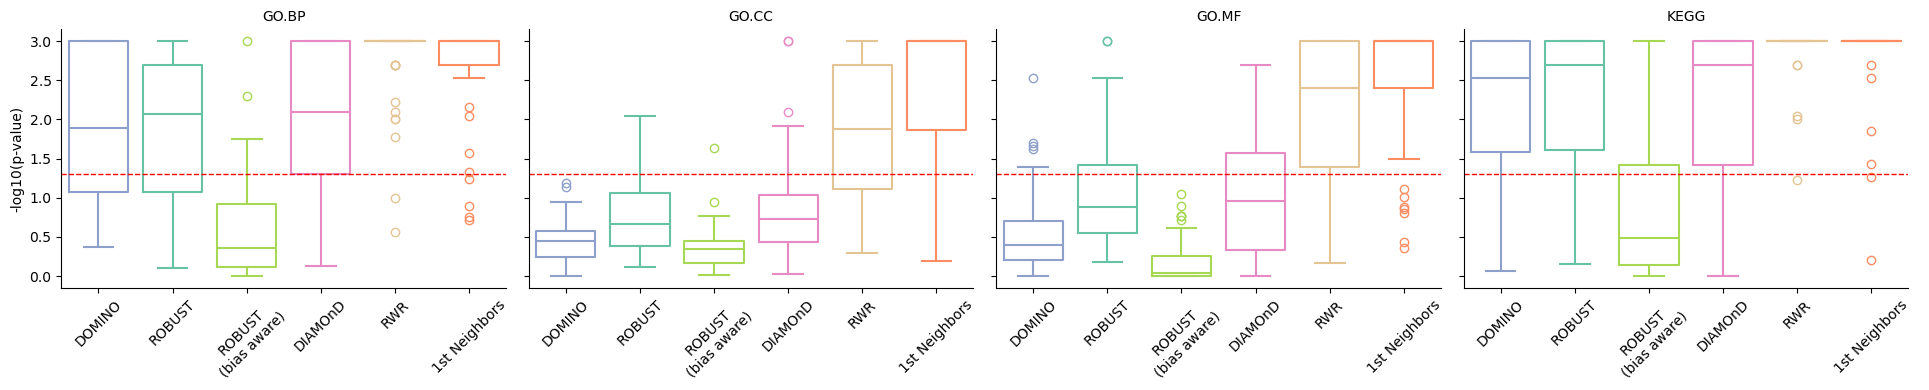

In [20]:
def digest_summary_plot(df, amim_meta_df):
    # Create FacetGrid
    g = sns.FacetGrid(
        df,
        col="source",
        sharey=True,
        height=4,
        aspect=1.2
    )

    # Map the stripplot to each facet
    g.map_dataframe(
        sns.boxplot,
        x="amim",
        y="value",
        hue="amim",
        palette=dict(zip(amim_meta_df.label, amim_meta_df.color)),
        hue_order=amim_meta_df.label,
        order=amim_meta_df.label,
        fill=False,
    )

    # Add horizontal lines to each subplot
    for ax in g.axes.flat:
        ax.axhline(y=-math.log10(0.05), color='red', linestyle='--', linewidth=1)

    # Clean up legend
    g.add_legend(title="")  # Optional: set legend title
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("", "-log10(p-value)")
    g.set_xticklabels(rotation=45)

    plt.tight_layout()
    plt.show()
    return g
digest_summary_plot(free_df, amim_meta_df)
digest_summary_plot(based_df, amim_meta_no_seeds_df)

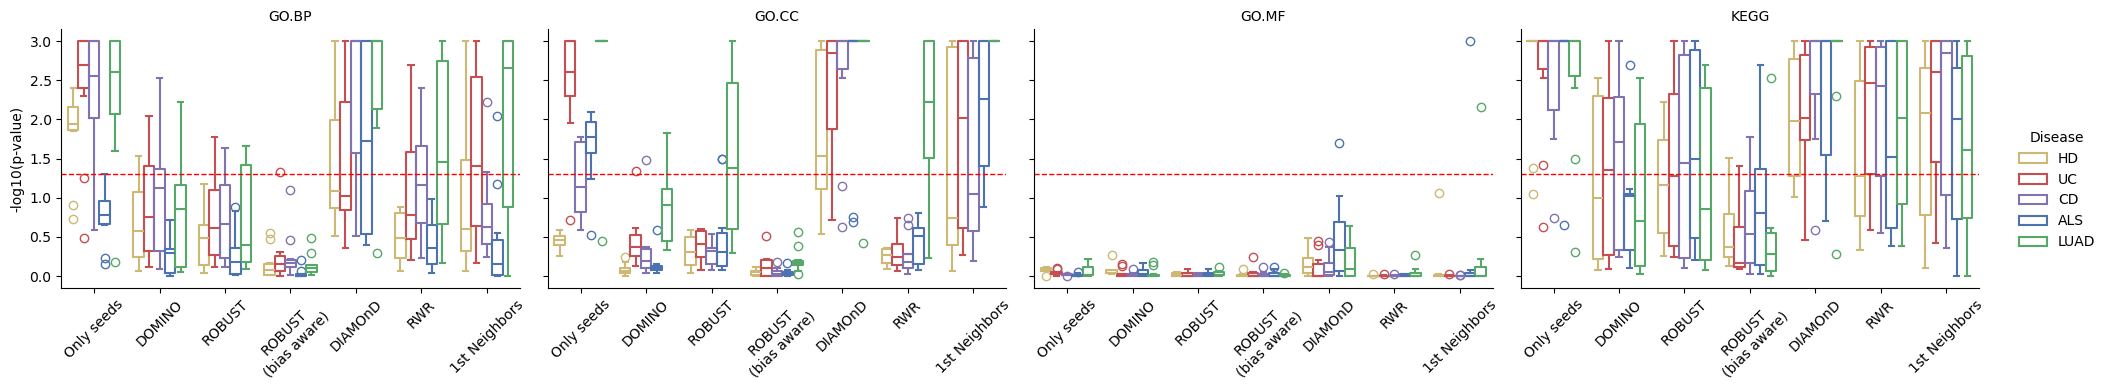

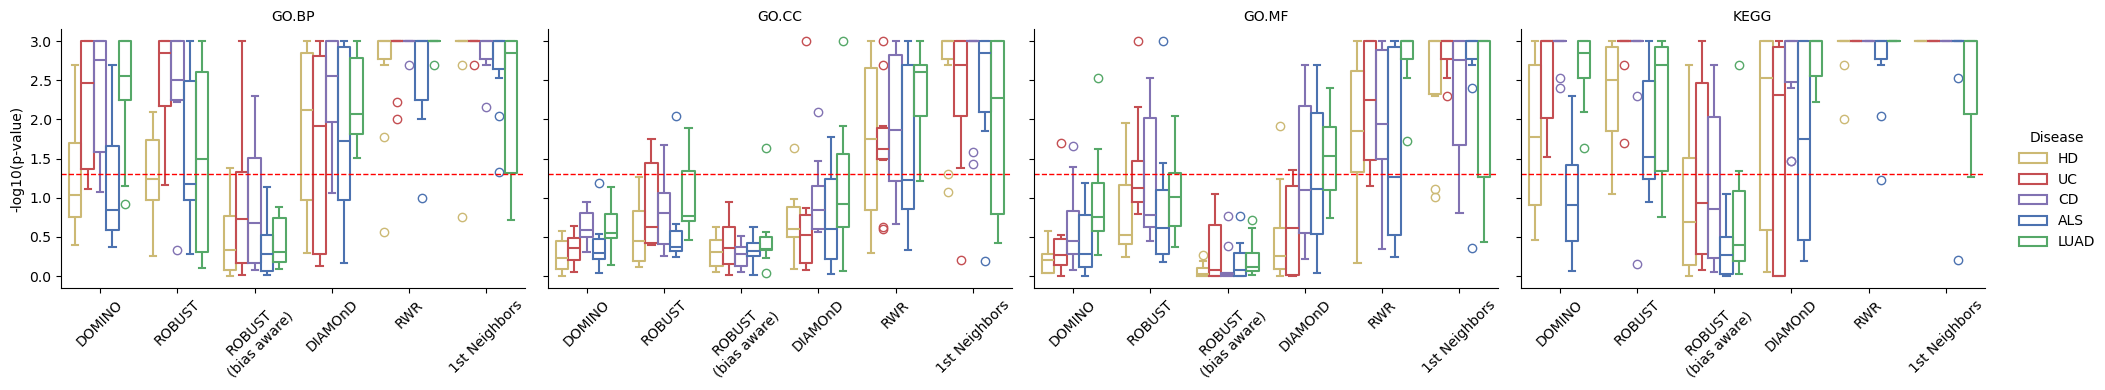

In [21]:
def digest_per_disease_plot(df, amim_meta_df, seed_meta_df):
    # Create FacetGrid
    g = sns.FacetGrid(
        df,
        col="source",
        sharey=True,
        height=4,
        aspect=1.2
    )

    # Map the stripplot to each facet
    g.map_dataframe(
        sns.boxplot,
        x="amim",
        y="value",
        hue="seed_id",
        palette=dict(zip(seed_meta_df.short, seed_meta_df.color)),
        hue_order=seed_meta_df.short,
        order=amim_meta_df.label,
        fill=False,
    )

    # Add horizontal lines to each subplot
    for ax in g.axes.flat:
        ax.axhline(y=-math.log10(0.05), color='red', linestyle='--', linewidth=1)

    # Clean up legend
    g.add_legend(title="Disease")
    g._legend.set_bbox_to_anchor((1.05, 0.5))
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("", "-log10(p-value)")
    g.set_xticklabels(rotation=45)

    plt.tight_layout()
    plt.show()
    return g
digest_per_disease_plot(free_df, amim_meta_df, seed_meta_df)
digest_per_disease_plot(based_df, amim_meta_no_seeds_df, seed_meta_df)

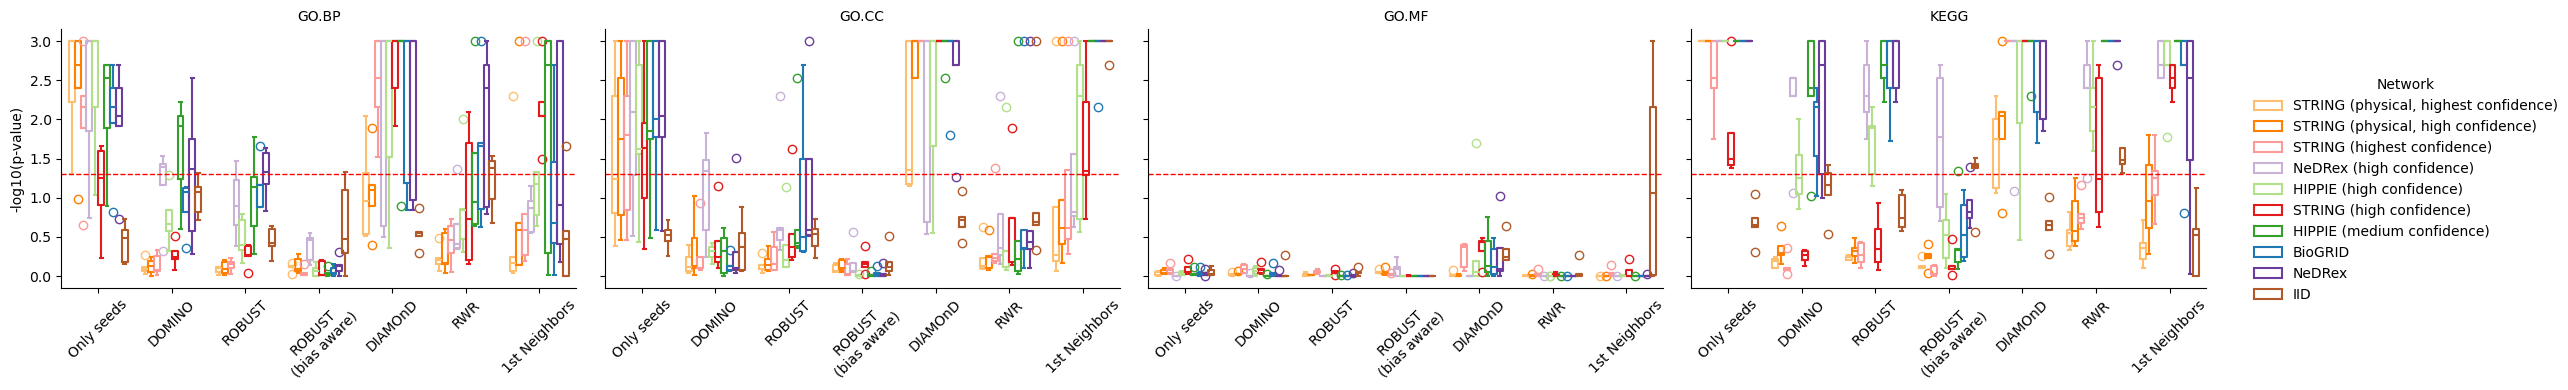

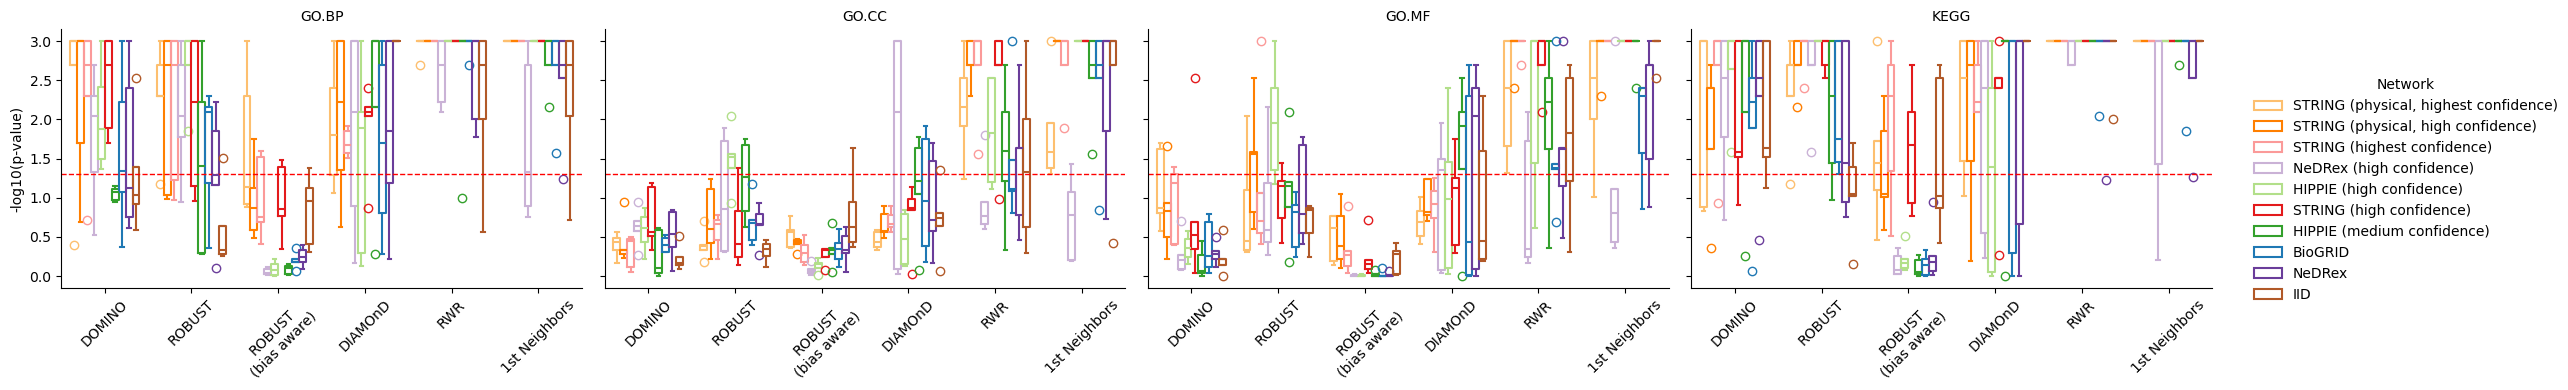

In [22]:
def digest_per_network_plot(df, amim_meta_df, network_meta_df):
    # Create FacetGrid
    g = sns.FacetGrid(
        df,
        col="source",
        sharey=True,
        height=4,
        aspect=1.2
    )

    # Map the stripplot to each facet
    g.map_dataframe(
        sns.boxplot,
        x="amim",
        y="value",
        hue="network",
        palette=dict(zip(network_meta_df.label, network_meta_df.color)),
        hue_order=network_meta_df.label,
        order=amim_meta_df.label,
        fill=False,
    )

    # Add horizontal lines to each subplot
    for ax in g.axes.flat:
        ax.axhline(y=-math.log10(0.05), color='red', linestyle='--', linewidth=1)

    # Clean up legend
    g.add_legend(title="Network")
    g._legend.set_bbox_to_anchor((1.15, 0.5))
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("", "-log10(p-value)")
    g.set_xticklabels(rotation=45)

    plt.tight_layout()
    plt.show()
    return g
# Plotting the summary for reference-free and reference-based digests
digest_per_network_plot(free_df, amim_meta_df, network_meta_df)
digest_per_network_plot(based_df, amim_meta_no_seeds_df, network_meta_df)

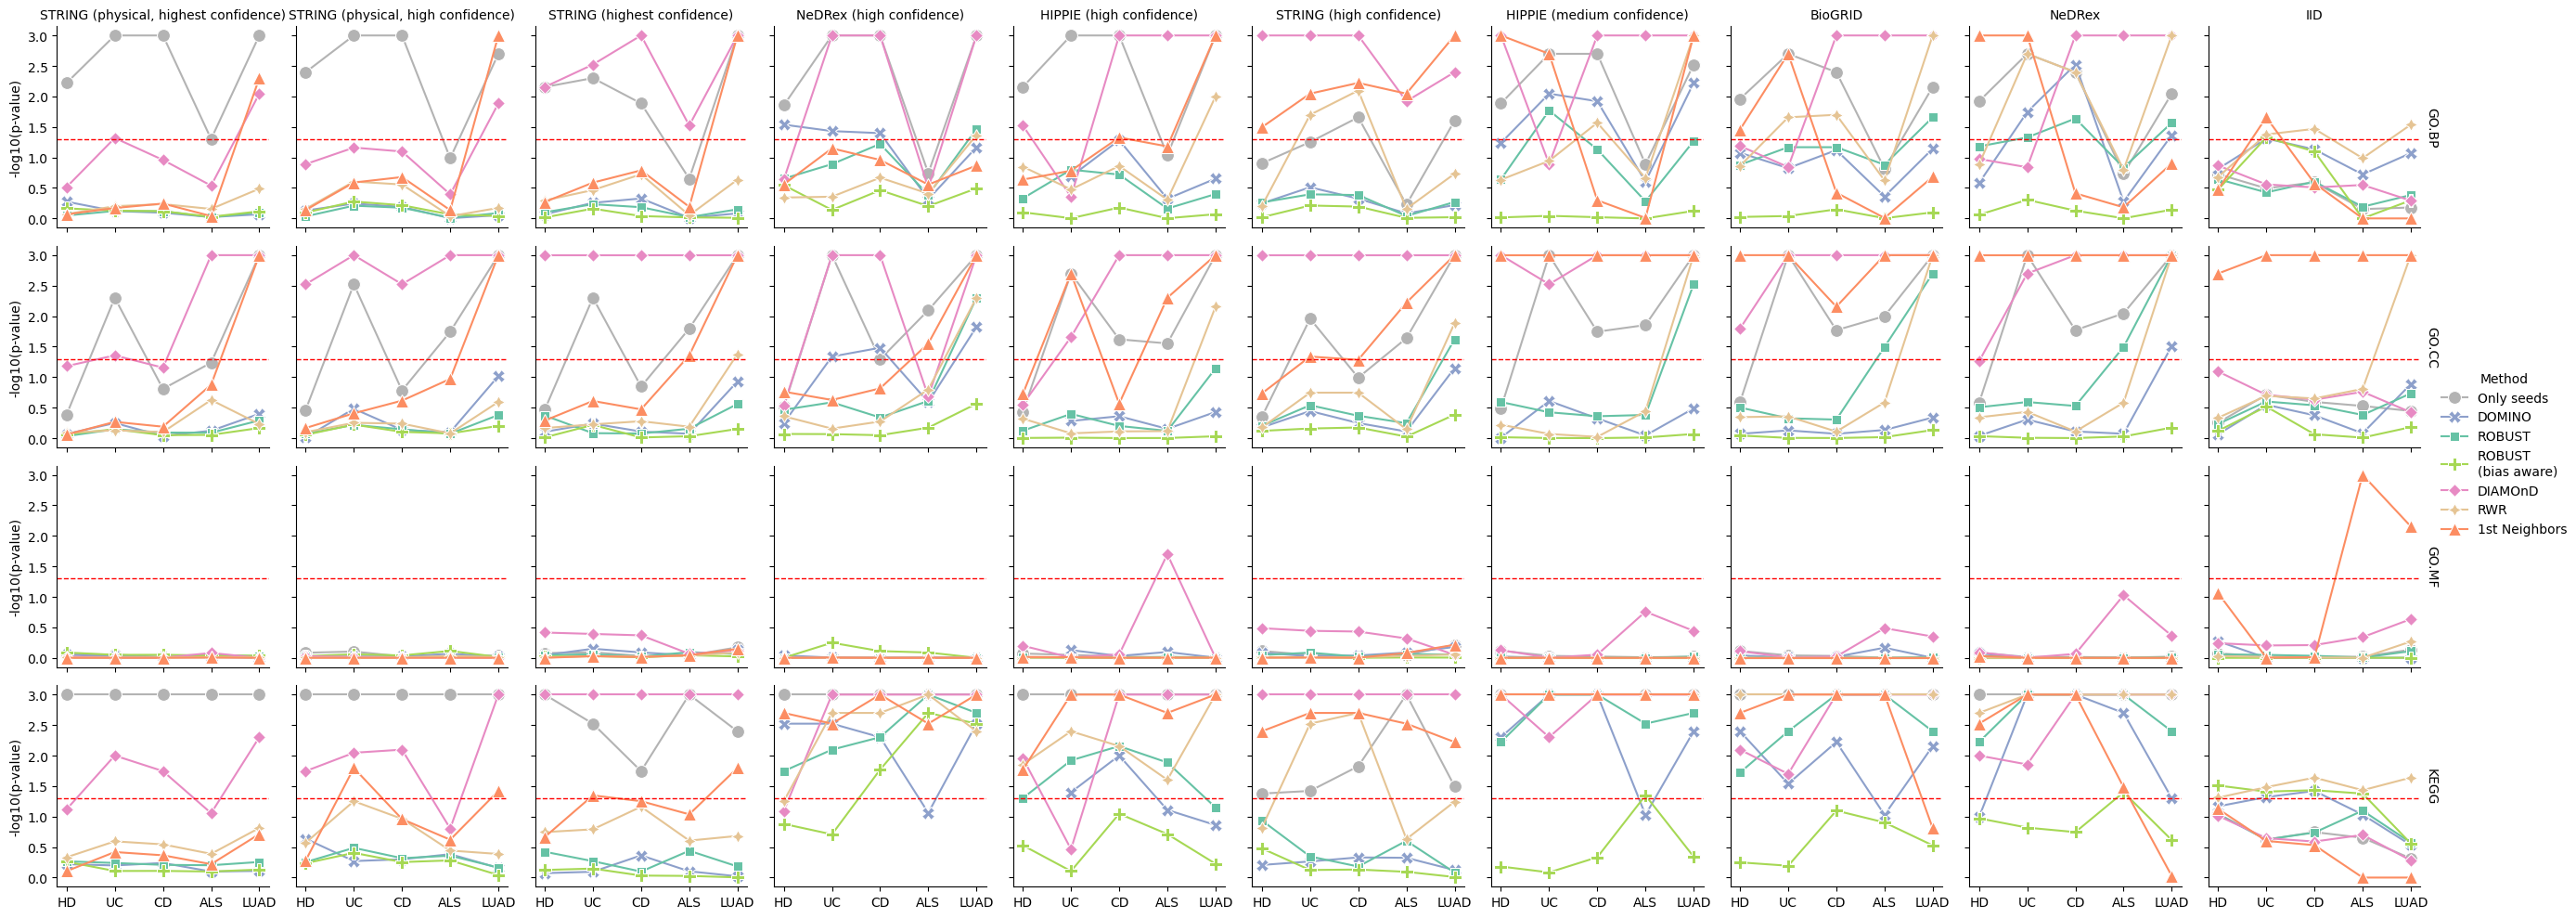

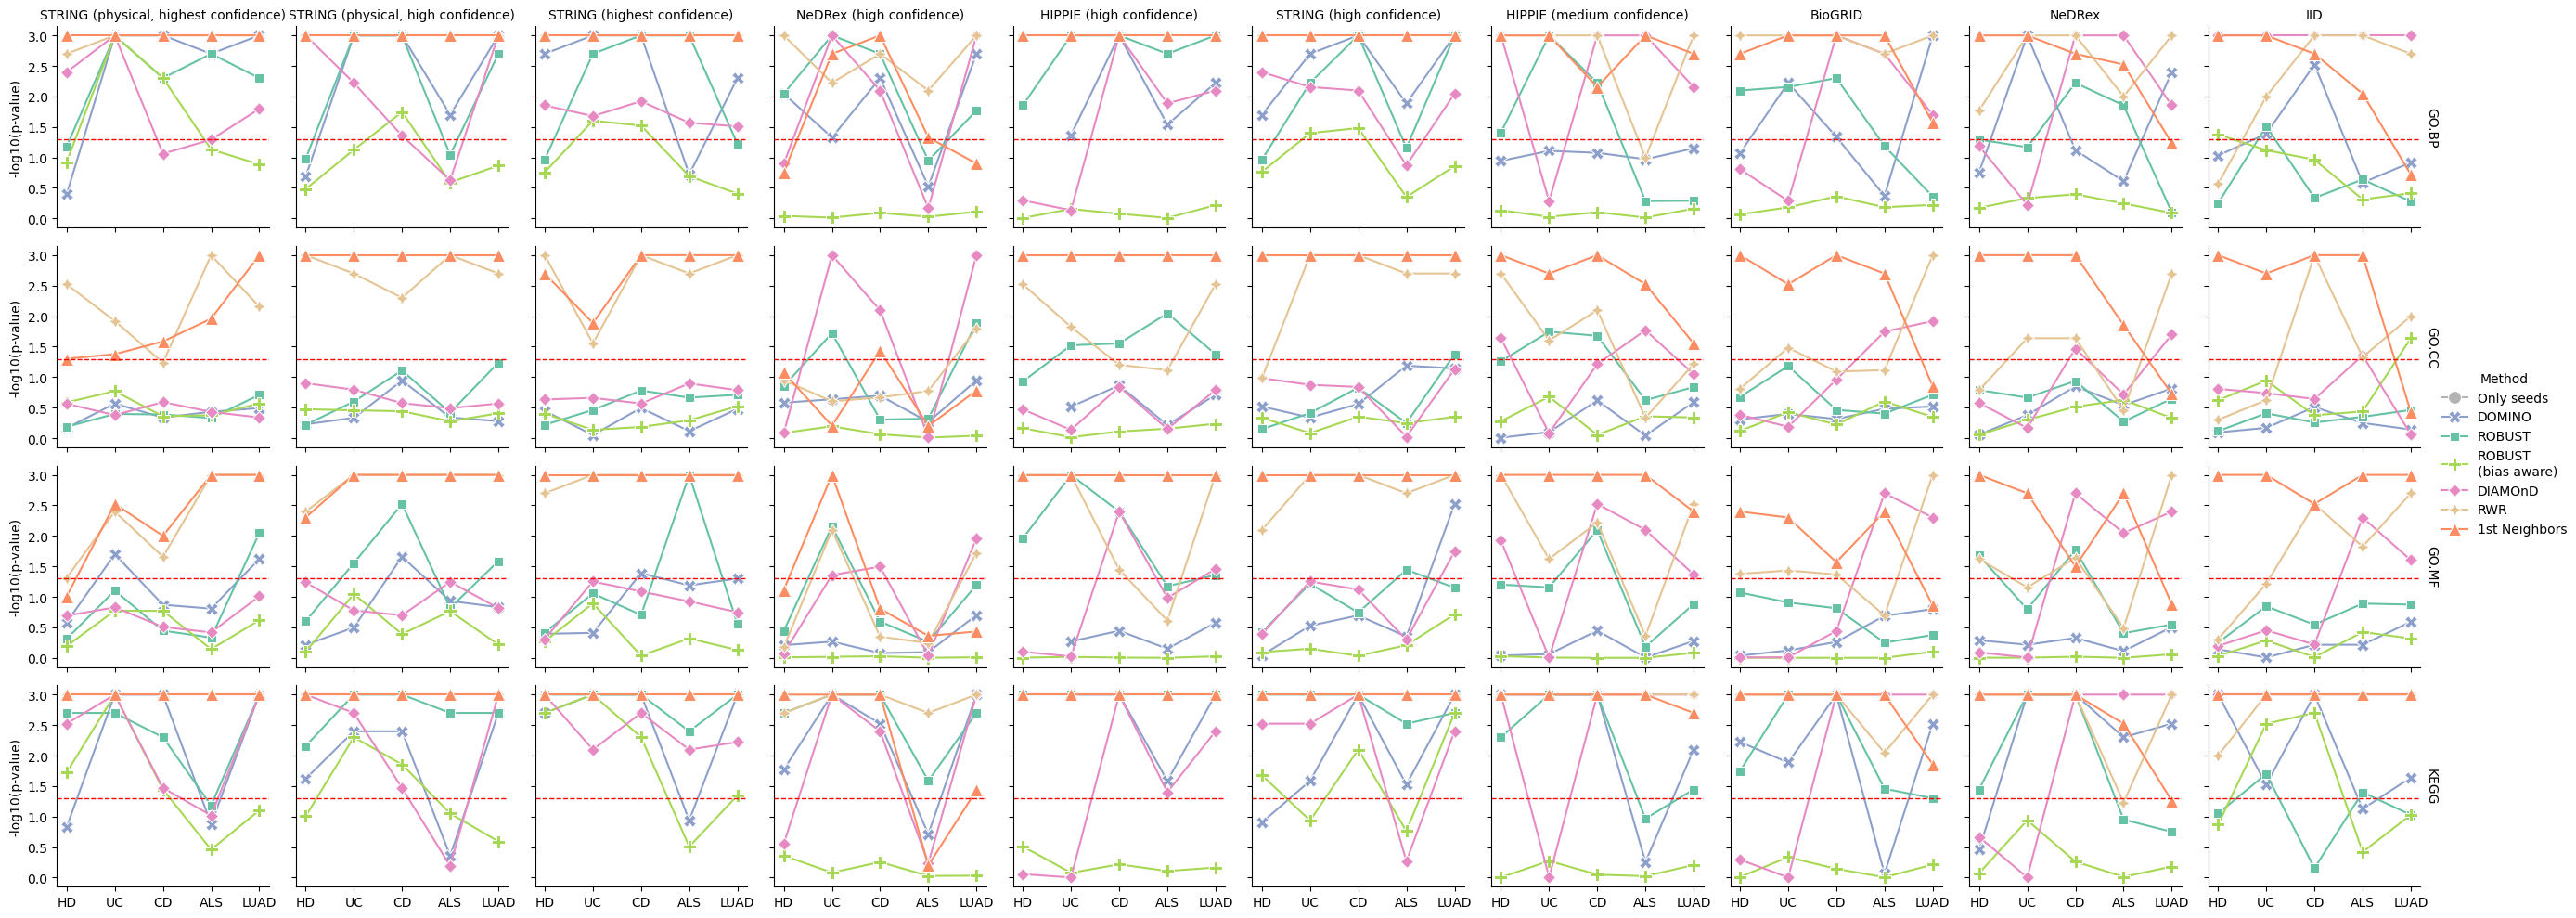

In [27]:
def digest_facet_plot(df, amim_meta_df, seed_meta_df, network_meta_df):
    # Create FacetGrid
    df['seed_id'] = pd.Categorical(df['seed_id'], seed_meta_df.short, ordered=True)

    g = sns.FacetGrid(
        df,
        col="network",
        col_order=network_meta_df.label,
        row="source",
        sharey=True,
        margin_titles=True,
        height=2.5,
        aspect=1,
    )

    # Map the stripplot to each facet
    g.map_dataframe(
        sns.lineplot,
        x="seed_id",
        y="value",
        hue="amim",
        palette=dict(zip(amim_meta_df.label, amim_meta_df.color)),
        hue_order=amim_meta_df.label,
        markers=True,
        style="amim",
        style_order=amim_meta_df.label,
        dashes=False,
    )

    # Add horizontal lines to each subplot
    for ax in g.axes.flat:
        ax.axhline(y=-math.log10(0.05), color='red', linestyle='--', linewidth=1)

        for line in ax.lines:
            line.set_markersize(10)  # Set marker size

    # Clean up legend
    g.add_legend(title="Method")
    g._legend.set_bbox_to_anchor((1.05, 0.5))
    g.set_titles(col_template="{col_name}",row_template="{row_name}")
    g.set_axis_labels("", "-log10(p-value)")
    #g.set_xticklabels(rotation=45)

    plt.tight_layout()
    plt.show()
    return g
digest_facet_plot(free_df, amim_meta_df, seed_meta_df, network_meta_df)
digest_facet_plot(based_df, amim_meta_df, seed_meta_df, network_meta_df)